# Step 1

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip -qq /content/gdrive/MyDrive/kagglecatsanddogs_5340.zip

Mounted at /content/gdrive


In [18]:
import os, shutil, pathlib

original_dir = pathlib.Path("PetImages")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [19]:
def make_subset(subset_name, start_index, end_index):
   for category in ("Cat", "Dog"):
       dir = new_base_dir / subset_name / category
       os.makedirs(dir)
       fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
       for fname in fnames:
           shutil.copyfile(src=original_dir/category / fname,
                           dst=dir / fname)

In [20]:
make_subset("train", start_index=667, end_index=1667)
make_subset("validation", start_index=1668, end_index=2168)
make_subset("test", start_index=2169, end_index=2669)

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Building the model**

In [22]:
img_size = (150, 150)
batch_size = 64

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
# Load and augment data
train_generator = train_datagen.flow_from_directory(
    new_base_dir / "train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    new_base_dir / "validation",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
test_generator = validation_datagen.flow_from_directory(
    new_base_dir / "test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [26]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

**Train and fit the data to the model**

In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/30
31/31 [==============================] - 15s 408ms/step - loss: 0.6926 - accuracy: 0.5108 - val_loss: 0.6884 - val_accuracy: 0.5000
Epoch 2/30
31/31 [==============================] - 14s 439ms/step - loss: 0.6893 - accuracy: 0.5237 - val_loss: 0.6831 - val_accuracy: 0.6104
Epoch 3/30
31/31 [==============================] - 13s 424ms/step - loss: 0.6846 - accuracy: 0.5475 - val_loss: 0.6751 - val_accuracy: 0.5990
Epoch 4/30
31/31 [==============================] - 14s 437ms/step - loss: 0.6813 - accuracy: 0.5708 - val_loss: 0.6826 - val_accuracy: 0.5229
Epoch 5/30
31/31 [==============================] - 13s 421ms/step - loss: 0.6778 - accuracy: 0.5764 - val_loss: 0.6624 - val_accuracy: 0.6135
Epoch 6/30
31/31 [==============================] - 14s 444ms/step - loss: 0.6691 - accuracy: 0.5943 - val_loss: 0.6702 - val_accuracy: 0.5688
Epoch 7/30
31/31 [==============================] - 14s 447ms/step - loss: 0.6641 - accuracy: 0.5945 - val_loss: 0.6509 - val_accuracy: 0.6292

**Displaying curves of loss and accuracy during training**

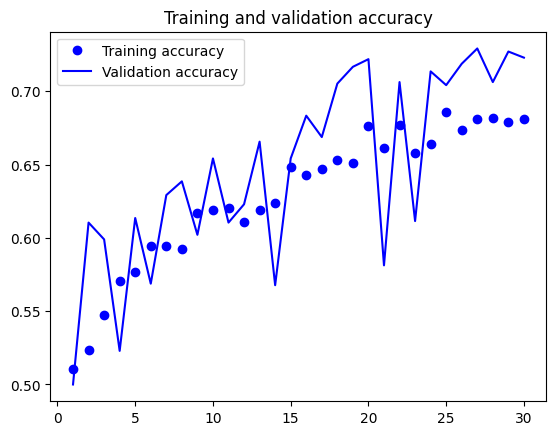

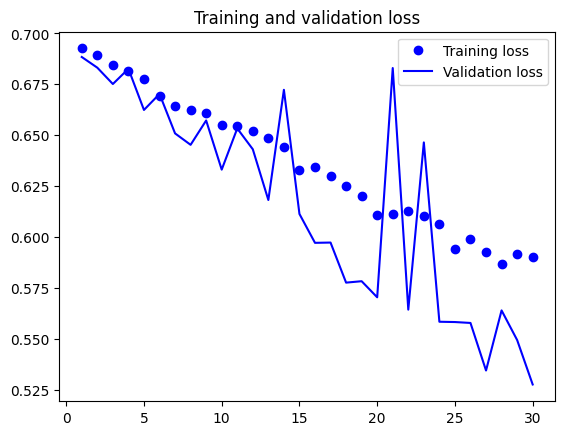

In [29]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Test Model**

In [30]:
# Evaluate the model on test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    new_base_dir / "test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 1000 images belonging to 2 classes.
16/16 [==============================] - 2s 111ms/step - loss: 0.5479 - accuracy: 0.7090
Test accuracy: 0.7089999914169312


# Step 2

In [31]:
import os, shutil, pathlib

original_dir = pathlib.Path("PetImages")
new_base_dir = pathlib.Path("cats_vs_dogs_large")

In [32]:
def make_subset(subset_name, start_index, end_index):
   for category in ("Cat", "Dog"):
       dir = new_base_dir / subset_name / category
       os.makedirs(dir)
       fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
       for fname in fnames:
           shutil.copyfile(src=original_dir/category / fname,
                           dst=dir / fname)

In [33]:
make_subset("train", start_index=667, end_index=2667)
make_subset("validation", start_index=2668, end_index=3168)
make_subset("test", start_index=3169, end_index=3669)

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Building the model**

In [35]:
img_size = (150, 150)
batch_size = 64

In [36]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [37]:
# Load and augment data
train_generator = train_datagen.flow_from_directory(
    new_base_dir / "train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    new_base_dir / "validation",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [38]:
test_generator = validation_datagen.flow_from_directory(
    new_base_dir / "test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [39]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [40]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

**Train and fit the data to the model**

In [41]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/30
62/62 [==============================] - 26s 406ms/step - loss: 0.6918 - accuracy: 0.5211 - val_loss: 0.6853 - val_accuracy: 0.5177
Epoch 2/30
62/62 [==============================] - 25s 403ms/step - loss: 0.6822 - accuracy: 0.5534 - val_loss: 0.6885 - val_accuracy: 0.5146
Epoch 3/30
62/62 [==============================] - 25s 404ms/step - loss: 0.6762 - accuracy: 0.5663 - val_loss: 0.6866 - val_accuracy: 0.5448
Epoch 4/30
62/62 [==============================] - 25s 404ms/step - loss: 0.6700 - accuracy: 0.5767 - val_loss: 0.6595 - val_accuracy: 0.5958
Epoch 5/30
62/62 [==============================] - 25s 405ms/step - loss: 0.6628 - accuracy: 0.5932 - val_loss: 0.6705 - val_accuracy: 0.5781
Epoch 6/30
62/62 [==============================] - 25s 406ms/step - loss: 0.6560 - accuracy: 0.6065 - val_loss: 0.6794 - val_accuracy: 0.5667
Epoch 7/30
62/62 [==============================] - 25s 405ms/step - loss: 0.6535 - accuracy: 0.6096 - val_loss: 0.6659 - val_accuracy: 0.5875

**Displaying curves of loss and accuracy during training**

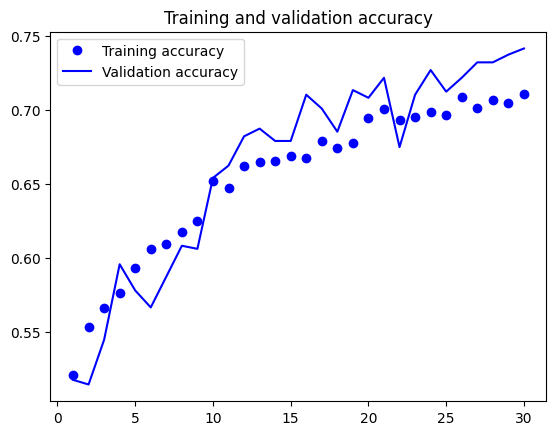

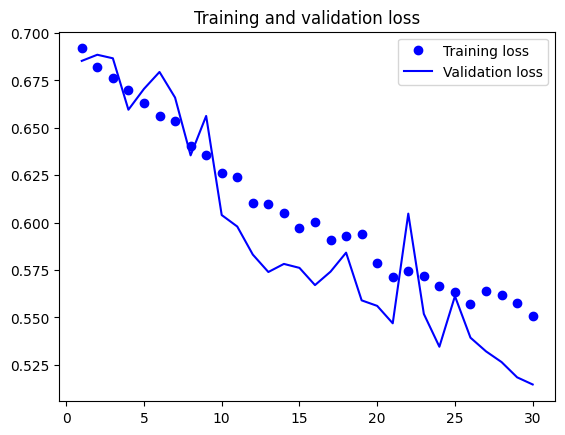

In [42]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Test model**

In [43]:
# Evaluate the model on test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    new_base_dir / "test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 1000 images belonging to 2 classes.
16/16 [==============================] - 2s 98ms/step - loss: 0.5108 - accuracy: 0.7440
Test accuracy: 0.7440000176429749


# Step 3

In [44]:
import os, shutil, pathlib

original_dir = pathlib.Path("PetImages")
new_base_dir = pathlib.Path("cats_vs_dogs_large2")

In [45]:
def make_subset(subset_name, start_index, end_index):
   for category in ("Cat", "Dog"):
       dir = new_base_dir / subset_name / category
       os.makedirs(dir)
       fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
       for fname in fnames:
           shutil.copyfile(src=original_dir/category / fname,
                           dst=dir / fname)

In [46]:
make_subset("train", start_index=667, end_index=6667)
make_subset("validation", start_index=6668, end_index=7668)
make_subset("test", start_index=7669, end_index=8669)

**Building the model**

In [47]:
img_size = (150, 150)
batch_size = 64

In [48]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [49]:
# Load and augment data
train_generator = train_datagen.flow_from_directory(
    new_base_dir / "train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    new_base_dir / "validation",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 12000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [50]:
test_generator = validation_datagen.flow_from_directory(
    new_base_dir / "test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [51]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [52]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

**Train and fit the data to the model**

In [53]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/30
187/187 [==============================] - 76s 398ms/step - loss: 0.6858 - accuracy: 0.5478 - val_loss: 0.6909 - val_accuracy: 0.5171
Epoch 2/30
187/187 [==============================] - 74s 398ms/step - loss: 0.6683 - accuracy: 0.5914 - val_loss: 0.6642 - val_accuracy: 0.5786
Epoch 3/30
187/187 [==============================] - 73s 392ms/step - loss: 0.6490 - accuracy: 0.6203 - val_loss: 0.6243 - val_accuracy: 0.6361
Epoch 4/30
187/187 [==============================] - 74s 395ms/step - loss: 0.6254 - accuracy: 0.6500 - val_loss: 0.6125 - val_accuracy: 0.6492
Epoch 5/30
187/187 [==============================] - 74s 394ms/step - loss: 0.6082 - accuracy: 0.6603 - val_loss: 0.5723 - val_accuracy: 0.7016
Epoch 6/30
187/187 [==============================] - 73s 392ms/step - loss: 0.5965 - accuracy: 0.6733 - val_loss: 0.5996 - val_accuracy: 0.6593
Epoch 7/30
187/187 [==============================] - 74s 397ms/step - loss: 0.5832 - accuracy: 0.6880 - val_loss: 0.5515 - val_ac

**Displaying curves of loss and accuracy during training**

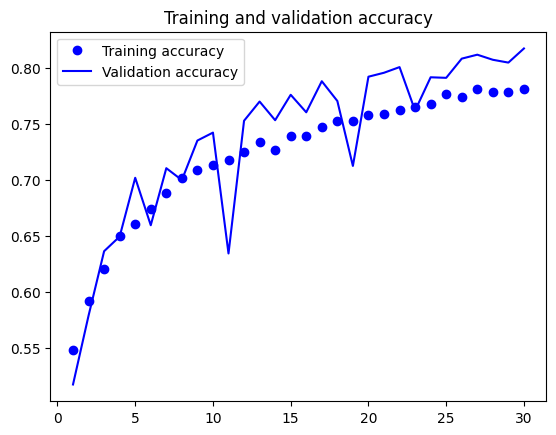

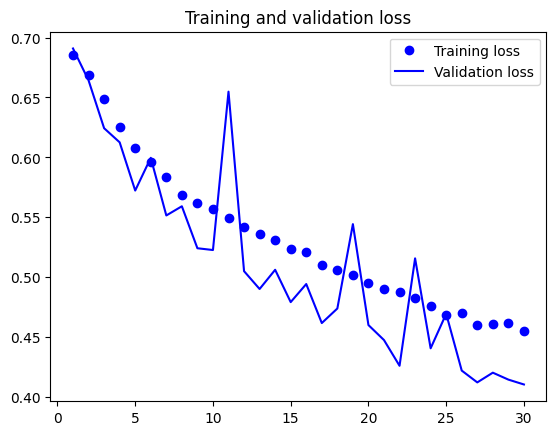

In [54]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Test the model**

In [55]:
# Evaluate the model on test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    new_base_dir / "test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 2000 images belonging to 2 classes.
32/32 [==============================] - 3s 94ms/step - loss: 0.3977 - accuracy: 0.8185
Test accuracy: 0.8184999823570251


# Step 4

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os, shutil, pathlib

original_dir = pathlib.Path("PetImages")
new_base_dir = pathlib.Path("cats_vs_dogs_pretrained")

In [4]:
def make_subset(subset_name, start_index, end_index):
   for category in ("Cat", "Dog"):
       dir = new_base_dir / subset_name / category
       os.makedirs(dir)
       fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
       for fname in fnames:
           shutil.copyfile(src=original_dir/category / fname,
                           dst=dir / fname)

In [5]:
make_subset("train", start_index=667, end_index=6667)
make_subset("validation", start_index=6668, end_index=7668)
make_subset("test", start_index=7669, end_index=8669)

**Building the model**

In [6]:
img_size = (150, 150)
batch_size = 64

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
pretrained_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

58889256/58889256 [==============================] - 2s 0us/step


In [9]:
pretrained_model.trainable = False

In [10]:
model_pretrained = models.Sequential([
    pretrained_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [11]:
model_pretrained.compile(loss='binary_crossentropy',
                         optimizer=optimizers.RMSprop(learning_rate=2e-5),
                         metrics=['accuracy'])

In [12]:
train_generator = train_datagen.flow_from_directory(
    new_base_dir / "train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    new_base_dir / "validation",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 12000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
test_generator = validation_datagen.flow_from_directory(
    new_base_dir / "test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [14]:
history_pretrained = model_pretrained.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/30
187/187 [==============================] - 77s 380ms/step - loss: 0.5742 - accuracy: 0.6976 - val_loss: 0.3795 - val_accuracy: 0.8518
Epoch 2/30
187/187 [==============================] - 73s 390ms/step - loss: 0.4442 - accuracy: 0.7891 - val_loss: 0.3249 - val_accuracy: 0.8644
Epoch 3/30
187/187 [==============================] - 72s 383ms/step - loss: 0.4114 - accuracy: 0.8111 - val_loss: 0.3067 - val_accuracy: 0.8664
Epoch 4/30
187/187 [==============================] - 72s 383ms/step - loss: 0.3839 - accuracy: 0.8264 - val_loss: 0.3044 - val_accuracy: 0.8710
Epoch 5/30
187/187 [==============================] - 72s 384ms/step - loss: 0.3724 - accuracy: 0.8282 - val_loss: 0.2889 - val_accuracy: 0.8730
Epoch 6/30
187/187 [==============================] - 73s 389ms/step - loss: 0.3659 - accuracy: 0.8327 - val_loss: 0.2791 - val_accuracy: 0.8816
Epoch 7/30
187/187 [==============================] - 72s 386ms/step - loss: 0.3571 - accuracy: 0.8364 - val_loss: 0.2761 - val_ac

**Test the model**

In [16]:
test_generator = validation_datagen.flow_from_directory(
    new_base_dir / "test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 2000 images belonging to 2 classes.


In [17]:
test_loss_pretrained, test_acc_pretrained = model_pretrained.evaluate(test_generator)
print('Pretrained model test accuracy:', test_acc_pretrained)

32/32 [==============================] - 4s 127ms/step - loss: 0.2077 - accuracy: 0.9140
Pretrained model test accuracy: 0.9139999747276306
